In [ ]:
# Ensure the Kaggle API is installed
# !pip install -q kaggle 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:

# Upload your Kaggle API token
# from google.colab import files
# files.upload()

# Download the dataset
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the fundus image dataset
!kaggle datasets download -d linchundan/fundusimage1000

# Unzip the dataset
with zipfile.ZipFile("fundusimage1000.zip","r") as zip_ref:
    zip_ref.extractall("fundus_images")

In [ ]:
import tensorflow as tf
import os
import numpy as np

# Define the root directory
root_dir = "/content/fundus_images/1000images"

# Define the target image size
image_size = (128, 128)

# List to store the images
images = []

# Walk through the directory structure
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(subdir, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)

# Convert list to numpy array
images = np.array(images)
print("Number of images loaded:", len(images))


Number of images loaded: 1994


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=128*128*3):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 3, 128, 128)  # Reshape to image dimensions
        return x

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128*128*3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim=128*128*3, num_classes=10):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Load the data
tensor_images = torch.tensor(images, dtype=torch.float32)
dataset = TensorDataset(tensor_images)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Instantiate models
generator = Generator()
discriminator = Discriminator()
classifier = Classifier()

# Define loss functions and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_C = optim.Adam(classifier.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for i, (imgs,) in enumerate(dataloader):
        # Train discriminator, generator, and classifier
        pass

    print(f"Epoch [{epoch+1}/{num_epochs}] completed")

# Generate synthetic images
z = torch.randn(64, 100)  # Example latent vector
generated_imgs = generator(z)


Epoch [1/100] completed
Epoch [2/100] completed
Epoch [3/100] completed
Epoch [4/100] completed
Epoch [5/100] completed
Epoch [6/100] completed
Epoch [7/100] completed
Epoch [8/100] completed
Epoch [9/100] completed
Epoch [10/100] completed
Epoch [11/100] completed
Epoch [12/100] completed
Epoch [13/100] completed
Epoch [14/100] completed
Epoch [15/100] completed
Epoch [16/100] completed
Epoch [17/100] completed
Epoch [18/100] completed
Epoch [19/100] completed
Epoch [20/100] completed
Epoch [21/100] completed
Epoch [22/100] completed
Epoch [23/100] completed
Epoch [24/100] completed
Epoch [25/100] completed
Epoch [26/100] completed
Epoch [27/100] completed
Epoch [28/100] completed
Epoch [29/100] completed
Epoch [30/100] completed
Epoch [31/100] completed
Epoch [32/100] completed
Epoch [33/100] completed
Epoch [34/100] completed
Epoch [35/100] completed
Epoch [36/100] completed
Epoch [37/100] completed
Epoch [38/100] completed
Epoch [39/100] completed
Epoch [40/100] completed
Epoch [41

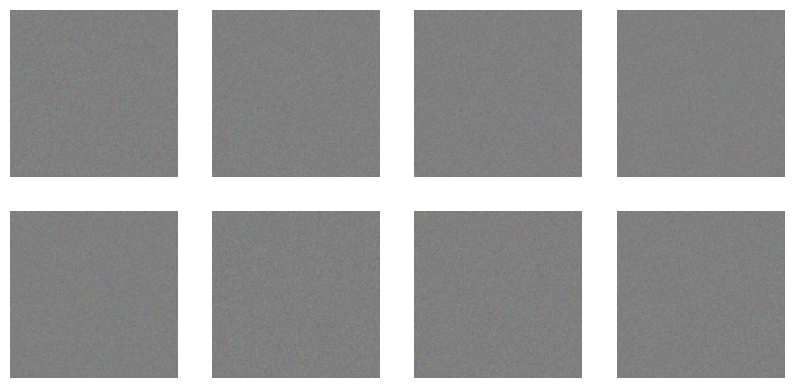

In [ ]:
# Display the generated images
def show_generated_images(images, n_images=8):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        img = images[i].detach().cpu().numpy().transpose(1, 2, 0)
        plt.imshow((img + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.show()

show_generated_images(generated_imgs)

Epoch [1/100], d_loss: 1.3813, g_loss: 0.7071
Epoch [2/100], d_loss: 0.7391, g_loss: 0.6977
Epoch [3/100], d_loss: 0.7554, g_loss: 0.7215
Epoch [4/100], d_loss: 0.7142, g_loss: 0.8053
Epoch [5/100], d_loss: 0.6686, g_loss: 0.8021
Epoch [6/100], d_loss: 0.7003, g_loss: 0.8774
Epoch [7/100], d_loss: 0.6564, g_loss: 0.9671
Epoch [8/100], d_loss: 2.1177, g_loss: 0.4828
Epoch [9/100], d_loss: 1.3095, g_loss: 0.2589
Epoch [10/100], d_loss: 2.1240, g_loss: 0.1705
Epoch [11/100], d_loss: 2.7743, g_loss: 0.1914
Epoch [12/100], d_loss: 2.4639, g_loss: 0.4798
Epoch [13/100], d_loss: 1.1698, g_loss: 1.6686
Epoch [14/100], d_loss: 4.2232, g_loss: 0.4443
Epoch [15/100], d_loss: 1.1078, g_loss: 0.3227
Epoch [16/100], d_loss: 1.4630, g_loss: 0.3445
Epoch [17/100], d_loss: 1.4099, g_loss: 0.4402
Epoch [18/100], d_loss: 1.1878, g_loss: 0.6561
Epoch [19/100], d_loss: 1.1163, g_loss: 0.6001
Epoch [20/100], d_loss: 1.1719, g_loss: 0.4807
Epoch [21/100], d_loss: 1.2929, g_loss: 0.5520
Epoch [22/100], d_loss

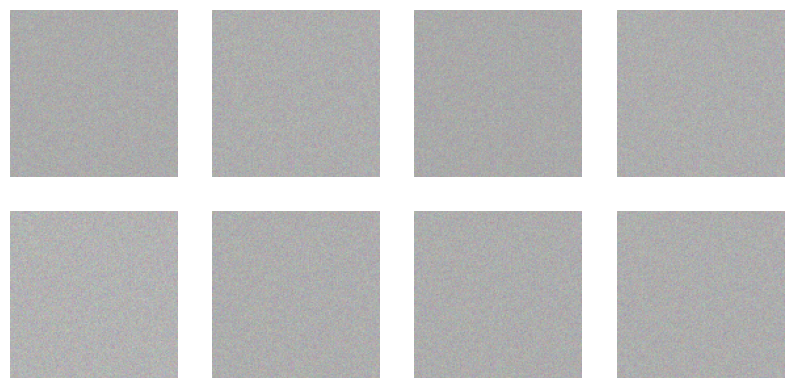

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Define the generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=128*128*3):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 3, 128, 128)  # Reshape to image dimensions
        return x

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128*128*3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim=128*128*3, num_classes=10):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Sample training data
images = np.random.rand(64, 128, 128, 3).astype(np.float32)  # Replace with actual images
tensor_images = torch.tensor(images, dtype=torch.float32)
dataset = TensorDataset(tensor_images)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Instantiate models
generator = Generator()
discriminator = Discriminator()
classifier = Classifier()

# Define loss functions and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_C = optim.Adam(classifier.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for i, (imgs,) in enumerate(dataloader):
        batch_size = imgs.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator
        outputs = discriminator(imgs)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Generate synthetic images
z = torch.randn(8, 100)  # Example latent vector
generated_imgs = generator(z)

# Display the generated images
def show_generated_images(images, n_images=8):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        img = images[i].detach().cpu().numpy().transpose(1, 2, 0)
        plt.imshow((img + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.show()

show_generated_images(generated_imgs)


Epoch [1/10], d_loss: 1.4028, g_loss: 0.6848, c_loss: 4.5612
Epoch [2/10], d_loss: 0.7596, g_loss: 0.6738, c_loss: 4.9883
Epoch [3/10], d_loss: 0.7780, g_loss: 0.6928, c_loss: 5.3357
Epoch [4/10], d_loss: 0.7379, g_loss: 0.7567, c_loss: 4.8003
Epoch [5/10], d_loss: 0.6769, g_loss: 0.8104, c_loss: 4.2781
Epoch [6/10], d_loss: 0.6412, g_loss: 0.8615, c_loss: 4.3279
Epoch [7/10], d_loss: 0.6247, g_loss: 0.8440, c_loss: 4.1846
Epoch [8/10], d_loss: 0.6852, g_loss: 0.8566, c_loss: 4.0572
Epoch [9/10], d_loss: 0.7685, g_loss: 0.6217, c_loss: 4.3254
Epoch [10/10], d_loss: 1.0980, g_loss: 0.4903, c_loss: 3.9234


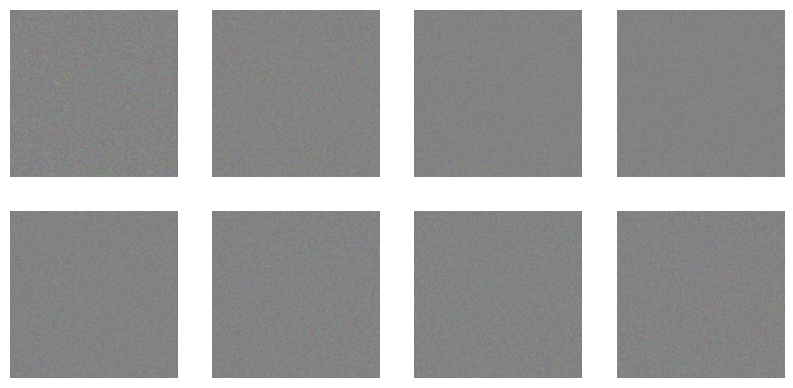

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Define the generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=128*128*3):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 3, 128, 128)  # Reshape to image dimensions
        return x

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128*128*3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim=128*128*3, num_classes=10):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Sample training data
images = np.random.rand(64, 128, 128, 3).astype(np.float32)  # Replace with actual images
labels = np.random.randint(0, 10, 64)  # Replace with actual labels
tensor_images = torch.tensor(images, dtype=torch.float32)
tensor_labels = torch.tensor(labels, dtype=torch.long)
dataset = TensorDataset(tensor_images, tensor_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Instantiate models
generator = Generator()
discriminator = Discriminator()
classifier = Classifier()

# Define loss functions and optimizers
criterion_D = nn.BCELoss()
criterion_C = nn.CrossEntropyLoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_C = optim.Adam(classifier.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        batch_size = imgs.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator
        outputs = discriminator(imgs)
        d_loss_real = criterion_D(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        d_loss_fake = criterion_D(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion_D(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Train classifier
        outputs = classifier(imgs)
        c_loss_real = criterion_C(outputs, labels)

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        fake_labels_gen = classifier(fake_images)
        c_loss_fake = criterion_C(fake_labels_gen, torch.argmax(fake_labels_gen, dim=1))

        c_loss = c_loss_real + c_loss_fake

        optimizer_C.zero_grad()
        c_loss.backward()
        optimizer_C.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, c_loss: {c_loss.item():.4f}")

# Generate synthetic images
z = torch.randn(8, 100)  # Example latent vector
generated_imgs = generator(z)

# Display the generated images
def show_generated_images(images, n_images=8):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        img = images[i].detach().cpu().numpy().transpose(1, 2, 0)
        plt.imshow((img + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.show()

show_generated_images(generated_imgs)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=128*128*3):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 3, 128, 128)  # Reshape to image dimensions
        return x

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128*128*3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim=128*128*3, num_classes=10):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x


In [ ]:
# Define the root directory
root_dir = "/content/fundus_images/1000images"

# Define the target image size
image_size = (128, 128)

# List to store the images and labels
images = []
labels = []

# Class labels mapping based on directory names
class_mapping = {
    '0.0.Normal': 0,
    '0.1.Tessellated fundus': 1,
    '0.2.Large optic cup': 2,
    '0.3.DR1': 3,
    '1.0.DR2': 4,
    '1.1.DR3': 5,
    '10.0.Possible glauco': 6,
    '10.1.Optic atrophy': 7,
    '18.Vitreous particles': 8
}

# Walk through the directory structure
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path).resize(image_size)
            img = np.array(img)
            img = img / 255.0  # Normalize to [0, 1]

            label = class_mapping.get(os.path.basename(subdir))
            if label is not None: # Only append if a label exists for the image
                images.append(img)
                labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert numpy arrays to tensors
tensor_images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
tensor_labels = torch.tensor(labels, dtype=torch.long)

# Create a dataset and data loader
dataset = TensorDataset(tensor_images, tensor_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

Epoch [1/50], d_loss: 0.8699, g_loss: 0.7623, c_loss: 4.4612
Epoch [2/50], d_loss: 0.8188, g_loss: 0.6939, c_loss: 3.5252
Epoch [3/50], d_loss: 0.7661, g_loss: 0.7667, c_loss: 3.6434
Epoch [4/50], d_loss: 0.8306, g_loss: 0.7198, c_loss: 3.9135
Epoch [5/50], d_loss: 1.5610, g_loss: 0.3827, c_loss: 3.7292
Epoch [6/50], d_loss: 1.0958, g_loss: 0.4778, c_loss: 2.9529
Epoch [7/50], d_loss: 0.9324, g_loss: 0.5818, c_loss: 3.4607
Epoch [8/50], d_loss: 1.1891, g_loss: 0.6482, c_loss: 2.3517
Epoch [9/50], d_loss: 1.3154, g_loss: 0.6824, c_loss: 2.0991
Epoch [10/50], d_loss: 1.2167, g_loss: 0.8578, c_loss: 2.3901
Epoch [11/50], d_loss: 1.4995, g_loss: 1.1824, c_loss: 2.4965
Epoch [12/50], d_loss: 1.2363, g_loss: 0.3493, c_loss: 1.7430
Epoch [13/50], d_loss: 1.3500, g_loss: 0.3401, c_loss: 1.3651
Epoch [14/50], d_loss: 1.2109, g_loss: 0.7501, c_loss: 1.1847
Epoch [15/50], d_loss: 1.3701, g_loss: 0.5989, c_loss: 1.3897
Epoch [16/50], d_loss: 1.3563, g_loss: 1.4021, c_loss: 1.5961
Epoch [17/50], d_

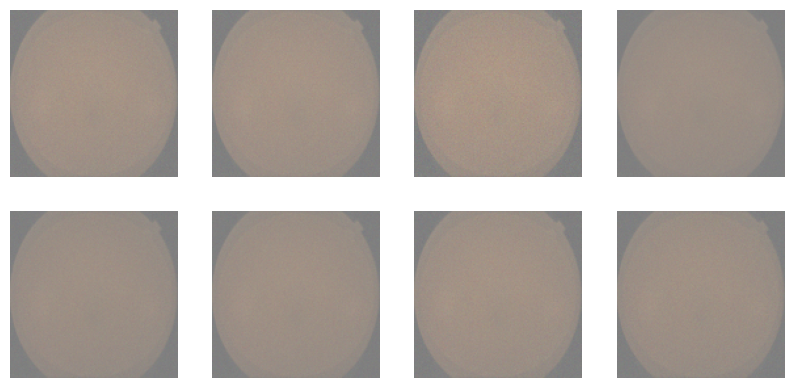

In [ ]:
# Instantiate models
generator = Generator()
discriminator = Discriminator()
classifier = Classifier()

# Define loss functions and optimizers
criterion_D = nn.BCELoss()
criterion_C = nn.CrossEntropyLoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_C = optim.Adam(classifier.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        batch_size = imgs.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator
        outputs = discriminator(imgs)
        d_loss_real = criterion_D(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        d_loss_fake = criterion_D(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion_D(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Train classifier
        outputs = classifier(imgs)
        c_loss_real = criterion_C(outputs, labels)

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        fake_labels_gen = classifier(fake_images)
        c_loss_fake = criterion_C(fake_labels_gen, torch.argmax(fake_labels_gen, dim=1))

        c_loss = c_loss_real + c_loss_fake

        optimizer_C.zero_grad()
        c_loss.backward()
        optimizer_C.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, c_loss: {c_loss.item():.4f}")

# Generate synthetic images
z = torch.randn(8, 100)  # Example latent vector
generated_imgs = generator(z)

# Display the generated images
def show_generated_images(images, n_images=8):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        img = images[i].detach().cpu().numpy().transpose(1, 2, 0)
        plt.imshow((img + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.show()

show_generated_images(generated_imgs)


**Triple GAN**

Epoch [1/100], d_loss: 0.8599, g_loss: 0.7201, c_loss: 3.5007
Epoch [2/100], d_loss: 1.0250, g_loss: 0.5950, c_loss: 4.3514
Epoch [3/100], d_loss: 0.5278, g_loss: 1.1874, c_loss: 3.4123
Epoch [4/100], d_loss: 1.0400, g_loss: 0.7048, c_loss: 2.7304
Epoch [5/100], d_loss: 1.0642, g_loss: 0.4740, c_loss: 3.5533
Epoch [6/100], d_loss: 1.0918, g_loss: 0.7744, c_loss: 2.3945
Epoch [7/100], d_loss: 1.1174, g_loss: 1.1727, c_loss: 2.3690
Epoch [8/100], d_loss: 1.3251, g_loss: 0.5956, c_loss: 2.2617
Epoch [9/100], d_loss: 1.5516, g_loss: 0.3244, c_loss: 1.5489
Epoch [10/100], d_loss: 1.7434, g_loss: 0.2083, c_loss: 2.4405
Epoch [11/100], d_loss: 1.5156, g_loss: 0.5337, c_loss: 1.8855
Epoch [12/100], d_loss: 1.3342, g_loss: 0.5950, c_loss: 1.5905
Epoch [13/100], d_loss: 1.4608, g_loss: 0.8586, c_loss: 1.1570
Epoch [14/100], d_loss: 1.4970, g_loss: 0.5040, c_loss: 1.2978
Epoch [15/100], d_loss: 1.7939, g_loss: 0.4289, c_loss: 1.3765
Epoch [16/100], d_loss: 1.6742, g_loss: 0.6402, c_loss: 1.4349
E

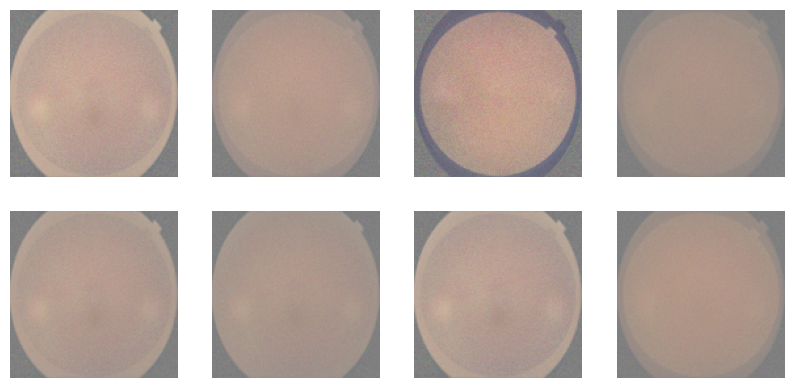

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=128*128*3):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 3, 128, 128)  # Reshape to image dimensions
        return x

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128*128*3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim=128*128*3, num_classes=10):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# Define the root directory
root_dir = "/content/fundus_images/1000images"

# Define the target image size
image_size = (128, 128)

# List to store the images and labels
images = []
labels = []

# Class labels mapping based on directory names
class_mapping = {
    '0.0.Normal': 0,
    '0.1.Tessellated fundus': 1,
    '0.2.Large optic cup': 2,
    '0.3.DR1': 3,
    '1.0.DR2': 4,
    '1.1.DR3': 5,
    '10.0.Possible glauco': 6,
    '10.1.Optic atrophy': 7,
    '18.Vitreous particles': 8
}

# Walk through the directory structure
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path).resize(image_size)
            img = np.array(img)
            img = img / 255.0  # Normalize to [0, 1]

            label = class_mapping.get(os.path.basename(subdir))
            if label is not None: # Only append if a label exists for the image
                images.append(img)
                labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert numpy arrays to tensors
tensor_images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
tensor_labels = torch.tensor(labels, dtype=torch.long)

# Create a dataset and data loader
dataset = TensorDataset(tensor_images, tensor_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
# Instantiate models
generator = Generator()
discriminator = Discriminator()
classifier = Classifier()

# Define loss functions and optimizers
criterion_D = nn.BCELoss()
criterion_C = nn.CrossEntropyLoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_C = optim.Adam(classifier.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        batch_size = imgs.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator
        outputs = discriminator(imgs)
        d_loss_real = criterion_D(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        d_loss_fake = criterion_D(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion_D(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Train classifier
        outputs = classifier(imgs)
        c_loss_real = criterion_C(outputs, labels)

        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        fake_labels_gen = classifier(fake_images)
        c_loss_fake = criterion_C(fake_labels_gen, torch.argmax(fake_labels_gen, dim=1))

        c_loss = c_loss_real + c_loss_fake

        optimizer_C.zero_grad()
        c_loss.backward()
        optimizer_C.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, c_loss: {c_loss.item():.4f}")

# Generate synthetic images
z = torch.randn(8, 100)  # Example latent vector
generated_imgs = generator(z)

# Display the generated images
def show_generated_images(images, n_images=8):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        img = images[i].detach().cpu().numpy().transpose(1, 2, 0)
        plt.imshow((img + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.show()

show_generated_images(generated_imgs)
